In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#loading the dataaset
data=pd.read_csv("Coustmer.csv")
data.head()

,Gender,Age,Payment Method,Churn,LastTransaction
0,male,64,credit card,loyal,98
1,male,35,cheque,churn,118
2,female,25,credit card,loyal,107
3,female,39,credit card,NaN,177
4,male,39,credit card,loyal,90


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           996 non-null    object
 1   Age              996 non-null    int64 
 2   Payment Method   996 non-null    object
 3   Churn            900 non-null    object
 4   LastTransaction  996 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 39.0+ KB


In [4]:
data.isnull().sum()

Gender              0
Age                 0
Payment Method      0
Churn              96
LastTransaction     0
dtype: int64

<Axes: >

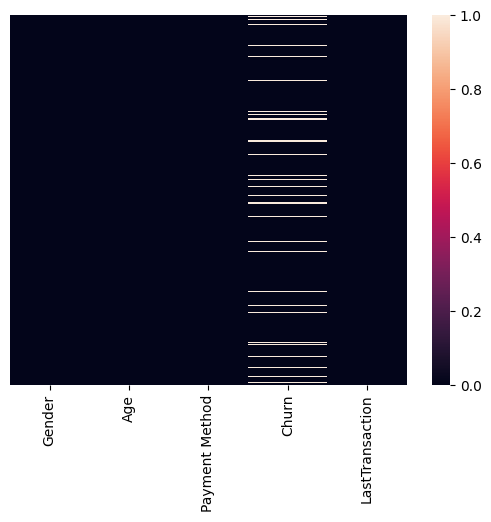

In [5]:
sns.heatmap(data.isnull(),yticklabels=False)

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 995
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           900 non-null    object
 1   Age              900 non-null    int64 
 2   Payment Method   900 non-null    object
 3   Churn            900 non-null    object
 4   LastTransaction  900 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 42.2+ KB


<Axes: >

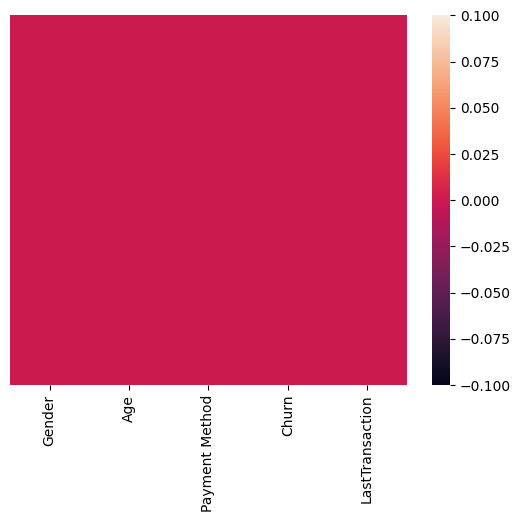

In [6]:
data=data.drop(data[data['Churn'].isnull()].index)
data.info()
sns.heatmap(data.isnull(),yticklabels=False)

In [7]:
data['Gender'] = [1 if x =="male"  else 0 for x in data['Gender']]
data

,Gender,Age,Payment Method,Churn,LastTransaction
0,1,64,credit card,loyal,98
1,1,35,cheque,churn,118
2,0,25,credit card,loyal,107
4,1,39,credit card,loyal,90
5,0,28,cheque,churn,189
...,...,...,...,...,...
990,1,19,credit card,loyal,92
991,0,29,credit card,loyal,33
992,1,84,credit card,loyal,124
994,1,19,credit card,loyal,49


In [14]:
data['Payment Method'] = [0 if x =="credit card"  else x for x in data['Payment Method']]
data['Payment Method'] = [1 if x =="cheque"  else x for x in data['Payment Method']]
data['Payment Method'] = [2 if x =="cash"  else x for x in data['Payment Method']]
data

,Gender,Age,Payment Method,Churn,LastTransaction
0,1,64,0,loyal,98
1,1,35,1,churn,118
2,0,25,0,loyal,107
4,1,39,0,loyal,90
5,0,28,1,churn,189
...,...,...,...,...,...
990,1,19,0,loyal,92
991,0,29,0,loyal,33
992,1,84,0,loyal,124
994,1,19,0,loyal,49


In [15]:
y=data["Churn"]
X=data
X=X.drop(columns="Churn")
X

,Gender,Age,Payment Method,LastTransaction
0,1,64,0,98
1,1,35,1,118
2,0,25,0,107
4,1,39,0,90
5,0,28,1,189
...,...,...,...,...
990,1,19,0,92
991,0,29,0,33
992,1,84,0,124
994,1,19,0,49


In [10]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test , y_train ,y_test = train_test_split(X,y,test_size = 0.3,random_state=21)

In [19]:
from sklearn.svm import SVC 
classifier = SVC(kernel = "linear",random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [20]:
classifier.predict(X_train)

array(['churn', 'churn', 'loyal', 'loyal', 'loyal', 'churn', 'loyal',
       'churn', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal',
       'loyal', 'churn', 'loyal', 'churn', 'churn', 'churn', 'loyal',
       'churn', 'churn', 'churn', 'churn', 'loyal', 'loyal', 'churn',
       'churn', 'loyal', 'churn', 'loyal', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'churn', 'loyal', 'loyal', 'loyal',
       'churn', 'churn', 'churn', 'loyal', 'loyal', 'churn', 'loyal',
       'churn', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal',
       'churn', 'loyal', 'churn', 'loyal', 'churn', 'churn', 'churn',
       'churn', 'churn', 'churn', 'churn', 'loyal', 'churn', 'loyal',
       'churn', 'loyal', 'loyal', 'loyal', 'loyal', 'churn', 'churn',
       'loyal', 'loyal', 'loyal', 'churn', 'churn', 'churn', 'churn',
       'loyal', 'loyal', 'churn', 'churn', 'loyal', 'churn', 'churn',
       'churn', 'chu

In [21]:
classifier.score(X_train,y_train)

0.7952380952380952